

# Project: TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

<ul>

<li>Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
    characters.</li>
<li>There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.</li>
<li>The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.</li>
</ul>

In terms of questions that can be explored from this data, my analysis is based on how  popularity, vote counts and release year affect revenue collection.

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (Replace this with more specific notes!)

In terms of data cleaning, I see that the existing data is clean enough, but there are some columns which I think will not help me in the data analysis process, so I will delete these columns(id , imdb_id  and homepage ) .

In [6]:
df.drop(['id', 'imdb_id','homepage'], axis = 1, inplace = True)

In [7]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 1.5+ MB


Because the column(genres) is an essential feature for parsing, and now it has some missing data, so I'm going to drop the missing data.
<br><br>
But before dropping the missing data, I will fill in the missing data for each of these features(cast,director, tagline, keywords, overview and production_companies )

In [9]:
df.fillna(value = {'cast':'unknown'
                                ,'director':'unknown'
                                ,'tagline':'unknown'
                                ,'keywords':'unknown'
                                ,'overview':'unknown'
                                ,'production_companies':'unknown'}
          
          ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
director                10866 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10866 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 1.5+ MB


In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 18 columns):
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10843 non-null object
director                10843 non-null object
tagline                 10843 non-null object
keywords                10843 non-null object
overview                10843 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    10843 non-null object
release_date            10843 non-null object
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj              10843 non-null float64
revenue_adj             10843 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 1.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question  (what are movies genres have the highest votes ?)

In [11]:
def AvgRev(x):
    median = x.median()
    
    low  = df[x <  median]
    high = df[x >= median]
    

    mean_revenue_low = low['revenue'].mean()
    mean_revenue_high = high['revenue'].mean()
    
    colors = ['red', 'blue']
    locations = [1, 2]
    heights = [mean_revenue_low, mean_revenue_high]
    labels = ['Low', 'High']
    return (locations, heights, labels, colors)

Text(0,0.5,'Average revenue')

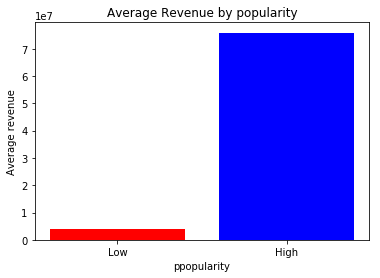

In [12]:
locations,heights,labels, colors = AvgRev(df['popularity'])  

plt.bar(locations, heights, tick_label=labels,  color = colors)
plt.title('Average Revenue by popularity')
plt.xlabel('ppopularity')
plt.ylabel('Average revenue')

####  It shows that there is a clear relationship between increased revenue and increased popularity. We note that the higher the popularity, the higher the revenue.

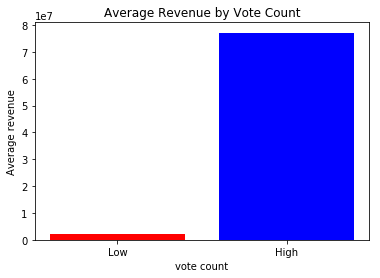

In [13]:
locations,heights,labels, colors = AvgRev(df['vote_count'])  

plt.bar(locations, heights, tick_label=labels,  color = colors)
plt.title('Average Revenue by Vote Count')
plt.xlabel('vote count')
plt.ylabel('Average revenue');

#### We note from the graph that there is a strong relationship between the increase in vote counts and the increase in revenues, as the increase in revenues depends largely on the increase in vote counts.

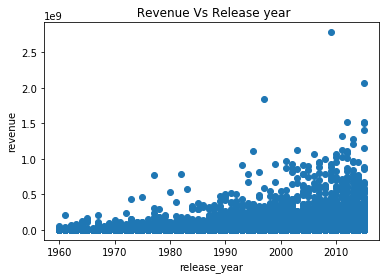

In [14]:
plt.scatter(df["release_year"],df["revenue"])
plt.title(' Revenue Vs Release year')
plt.xlabel('release_year')
plt.ylabel('revenue');
plt.show()

#### It also appears that the increase in revenues increases over time, as the revenues increase with the progression of the years as can be seen in the figure.

<a id='conclusions'></a>
## Conclusions :

>In my analysis of the data of this project, I relied on the feature Revenue, we note that the increase the popularity, the increase the Revenue  and vice versa.

>We also note that the greater the number of votes on the movie, it leads to an increase in Revenue and vice versa

>We also note that the revenue increases very significantly with the increase of the release year


## limitations :

>To implement this project, I used a (TMDB Movie) dataset , and the analysis focused on popularity, Count of votes and year of release. My analysis is limited to the dataset presented only. For example, the dataset does not contain where movies are shown.

>There are several missing values ​​that may skew my analysis and may show an unintended bias towards the relationship being analyzed. Plus, it forced me to work harder on the data cleaning phase.

In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0